In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select

driver= webdriver.Chrome("C:\webdrivers\chromedriver")
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="af68e86124c74541186317ea1cf08527")>

# Login to your Instagram Handle
a.Submit with sample username and password

In [40]:
driver.get("https://www.instagram.com/")
driver.title

'Instagram'

In [41]:
username = driver.find_element_by_name('username')
username.send_keys('SAMPLE USERNAME')

password = driver.find_element_by_name('password')
password.send_keys('SAMPLE PASSWORD')

login = driver.find_element_by_xpath('//div[contains(@class,"DhRcB")]')
login.submit()

waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "MWDvN")))

Save your login Info ?

In [42]:
driver.find_element_by_xpath('//button[contains(@class, "yWX7d")]').click()
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "zGtbP ")))

Turn on Notifications?

In [43]:
driver.find_element_by_class_name('HoLwm').click()
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "zGtbP ")))


## Q1.1 Re-Scraping the instagram handles which will appear on typing "Food" in the search bar.

In [44]:
#searching for "food" again in the search bar and storing the top 10 usernames in a list
search_input =    driver.find_element_by_xpath("//input[@placeholder='Search']")
search_input.clear()
search_input.send_keys("food")
user_ids = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, "//a[@class='-qQT3']")))

In [45]:
from bs4 import BeautifulSoup
# Store user_handles with profile links
store_user_ids = []
for user_id in user_ids:
    html_content = user_id.get_attribute('outerHTML')
    data = BeautifulSoup(html_content,'html.parser').a['href']
    user_id = data.split('/')[1]
    if user_id!='explore':
        store_user_ids.append([user_id,data])
        


In [46]:
store_user_ids

[['yourfoodlab', '/yourfoodlab/'],
 ['foodie_incarnate', '/foodie_incarnate/'],
 ['dilsefoodie', '/dilsefoodie/'],
 ['foodzeee', '/foodzeee/'],
 ['food_is__here19', '/food_is__here19/'],
 ['chennaifoodtrails', '/chennaifoodtrails/'],
 ['food', '/food/'],
 ['fearless_.foodie', '/fearless_.foodie/'],
 ['nomadfoodproject', '/nomadfoodproject/'],
 ['foodpandits', '/foodpandits/'],
 ['food_lunatic', '/food_lunatic/'],
 ['pubgfoodcitycafe', '/pubgfoodcitycafe/'],
 ['foodisygwalior', '/foodisygwalior/'],
 ['harveyproducts', '/harveyproducts/'],
 ['foodrush.recipe', '/foodrush.recipe/'],
 ['vishithakur', '/vishithakur/'],
 ['indorefoodexplorer', '/indorefoodexplorer/'],
 ['tagzfoods', '/tagzfoods/'],
 ['foodys', '/foodys/'],
 ['foodgod', '/foodgod/'],
 ['foodiemodi', '/foodiemodi/'],
 ['bisckoo', '/bisckoo/'],
 ['delhifoodwalks', '/delhifoodwalks/'],
 ['foodinsider', '/foodinsider/'],
 ['foodhallindia', '/foodhallindia/'],
 ['foodie.reel', '/foodie.reel/'],
 ['kashmirfoodgram', '/kashmirfoodgr

In [47]:
def get_follower_count(user_handle): 
    time.sleep(1)
    base_url = "https://instagram.com"
    driver.get(base_url+user_handle[1])
    time.sleep(2)
    tag = driver.find_element_by_partial_link_text("followers")
    data = BeautifulSoup(tag.get_attribute('outerHTML'),'html.parser').find('span').get('title')
    follower_count = int(data.replace(',',''))
    user_id_followers.append([follower_count,user_handle[0],user_handle[1]])

# Only 10 user id with there profile link
store_user_ids = store_user_ids[:10]

user_id_followers = []

    
for user_id in store_user_ids:
    get_follower_count(user_id)

# TOP FIVE USER HANDLES WITH FOLLOWERS, PROFILE LINK
user_id_followers.sort(reverse=True)
user_id_followers = user_id_followers[:5]
for user_id in user_id_followers:
    print(user_id)

[1870717, 'yourfoodlab', '/yourfoodlab/']
[1228427, 'foodie_incarnate', '/foodie_incarnate/']
[1146381, 'foodzeee', '/foodzeee/']
[967581, 'dilsefoodie', '/dilsefoodie/']
[161270, 'food', '/food/']


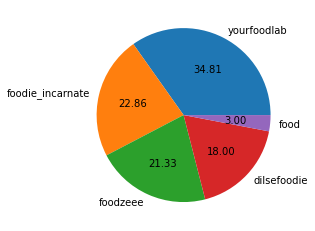

In [48]:
# Pie Graph just to get the idea which user_handle has more followers.
counts = [i[0] for i in user_id_followers]
user_ids = [i[1] for i in user_id_followers]
plt.pie(counts,labels=user_ids,autopct="%.2f")
plt.show()

## Q1.2. Finding the number of posts these handles have done in the previous 3 days.

In [81]:
#iterating through the list of top 5 users with maximum followers
#and counting the number of posts they have done in past 3 days
no_of_posts=[]
for user in user_id_followers:
    time.sleep(3)
    
    # searching the insta handle
    print(user[1], end=' ')
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user[1])
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//a[@class='-qQT3']")))
    driver.find_element_by_xpath("//a[@class='-qQT3']").click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="v9tJq AAaSh VfzDr"]')))
    time.sleep(1)
    
    #finding list of posts
    posts = driver.find_elements_by_xpath('//div[@class="v1Nh3 kIKUG _bz0w"]')
    time.sleep(5)
    count=0
    
    # iterating through latest 10 posts
    for i in posts:
        i.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//time[contains(@class, "_1o9PC ")]')))
        time_string=driver.find_element_by_xpath('//time[contains(@class, "Nzb55")]').get_attribute('innerHTML')
        if time_string=="1d" or time_string=="2d" or time_string=="3d" or time_string[-1]=="h" or time_string[-1]=="m" or time_string[-1]=="s":
            count +=1
        else:
            driver.back()
            break
        driver.back()
        time.sleep(1)
        
        
    print("have done", count, "posts in past 3 days")
    no_of_posts.append(count)

yourfoodlab have done 5 posts in past 3 days
foodie_incarnate have done 6 posts in past 3 days
foodzeee have done 2 posts in past 3 days
dilsefoodie have done 6 posts in past 3 days
food have done 5 posts in past 3 days


In [99]:
user_handle = []
for i in user_id_followers:
    user_handle.append(i[1])

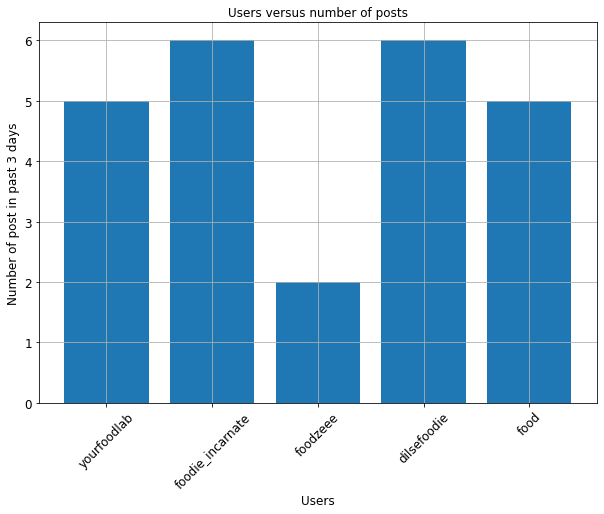

In [105]:
import warnings
warnings.filterwarnings("ignore")
#graph between top 5 users and the number of posts
# Depict this information using a suitable graph.
plt.figure(figsize=(10, 7))
plt.bar(user_handle, no_of_posts)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus number of posts', size=12)
plt.xlabel('Users', size=12)
plt.ylabel('Number of post in past 3 days', size=12)
plt.grid()
plt.show()

## Q2.1. Opening the 5 handles I obtained in the last question, and scraping the content of the first 10 posts of each handle

In [170]:
#will open the handle insta page

def search_and_open(profile):
    driver.refresh()
    wait = WebDriverWait(driver, 10)
    base_url = "https://instagram.com/"
    driver.get(base_url+profile)
    time.sleep(2)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="v1Nh3 kIKUG _bz0w"]')))
    time.sleep(1)

In [176]:

#retrive the content from each post 

def get_content():

    wait = WebDriverWait(driver, 10)
    post = wait.until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "_9AhH0")]')))
    post.click()
    
    count = 0
    content_list = []
    
    while count < 10:

        content = wait.until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "C4VMK")]')))

        data = driver.page_source
        html_data = BeautifulSoup(data, 'html.parser')

        content_data = html_data.find(class_ = 'C4VMK')
        c = content_data.contents[1]
        content_list.append(list(c.stripped_strings))
        count = count + 1
        
        next_ = wait.until(EC.element_to_be_clickable((By.XPATH, '//div[contains(@class, "l8mY4")]')))
        next_.click()
        

    return content_list

In [177]:
def get_content_handles(handles):
    
    content_list = []
    
    for h in handles:
        search_and_open(h)
        time.sleep(2)
        content = get_content()
        
        print('The content of the first 10 posts of', h, 'are:')
        print()
        for l in content:
            for c in l:
                print(c)
            print("------------------------------------------------")
        print("****************************************************")
        print()
        content_list.append(content)
    return content_list
    


In [178]:
#user_handle = ['yourfoodlab', 'foodie_incarnate', 'foodzeee', 'dilsefoodie', 'food' ]

ans_21 = get_content_handles(user_handle)

The content of the first 10 posts of yourfoodlab are:

Midnight Cravings? 😋✨ Strawberry Cream is all i need rn cuz i love it berry much 🍓
#mahableshwar
#mahableshwardiaries❤️
#strawberry
#strawberrycream
------------------------------------------------
Drop a heart if food is your only Bae on Valentine’s Day & tag your single AF foodie friends ❤️ 😜
#FoodIsMyBae
#valentineday
------------------------------------------------
Eggless Red Velvet Cupcakes by
@payal_kapoor
❤️
For all things frosty and sweet 😋🧁 Treat yourself this Valentine and sprinkle some frosted happiness with your loved ones ❤️ Live, love and eat cupcakes!!!
.
.
.
.
#valentineday
#valentine
#valentineweek
#valentinecake
#redvelvetcake
#redvelvetcupcakes
#sanjyotkeer
#celebration
#foodporn
------------------------------------------------
Cup full of cake and heart!!
My lovely wife
@payal_kapoor
Baked these super delicious cupcakes for me✨🥰 Cuz all we need is love, and lots of lovely cupcakes ❤️
What are you cooking for yo

The content of the first 10 posts of foodzeee are:

Traditional feast 💛
Food brings people together on many different levels. It's nourishment of the soul and body; it's truly love.”
#foodzeee
------------------------------------------------
Then nellikai / Amla  murabba
Detailed recipe video will be uploaded on my YouTube channel soon.
#thennellikka
#amlamurabba
------------------------------------------------
#RefreshWithHeritage
Challenge. We made a super refreshing and creamy rich falooda with
@heritagefoodslimited
Vanilla and Strawberry milkshake 🧃
The milkshakes are so delicious, thick, refreshing, and wholesome that it will be difficult not to finish them before you start with the recipe❤️
Do participate in
#RefreshWithHeritage
with your loved ones challenge. Make a reel showing your unusual and fascinating ways to enjoy these milkshakes and use the hashtag
#RefreshWithHeritage
. Churn your creative wheels and be the lucky one to win the hamper.
Follow
@heritagefoodslimited
on I

## 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word

In [183]:
import re


def remove_emoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  
        u"\u3030"                       
        "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
    

In [184]:
def get_word_freq(content_list):
    d = {}
    d_h = {}

    for h in content_list:
        for l in h:
            for s in l:
                s = remove_emoji(s)
                s = s.replace('-',' ')
                s = s.replace('.',' ')
                s = s.replace(',',' ')
                s = s.replace('!','')
                s = s.replace('?','')
                s = s.replace(':','')
                s = s.replace('(','')
                s = s.replace(')','')
                s = s.replace('/','')
                s = s.replace("'",'')
                s = s.replace('"','')
                s = s.replace('•','')
                s = re.sub(" \d+", " ", s)
                for w in s.split(" "):
                    if w != " " and w != "":
                        d[w] = d.get(w,0) + 1
                        if w[0] == '#':
                            d_h[w] = d_h.get(w,0) + 1
    return [d, d_h]


In [185]:
ans_22 = get_word_freq(ans_21)

# Result description:
# ans_22[0] is a dictinary with all words (including hastags) as keys and their frequency as values
# ans_22[1] is a dictinary with only all hastags as keys and their frequency as values


print('List of all words used in all the scraped posts along with the frequency of each word are:')
for k,v in ans_22[0].items():
    if k.isnumeric():
        continue
    else:
        print(k,':', v)

List of all words used in all the scraped posts along with the frequency of each word are:
Midnight : 1
Cravings : 1
Strawberry : 2
Cream : 2
is : 15
all : 3
i : 5
need : 2
rn : 1
cuz : 1
love : 5
it : 9
berry : 1
much : 1
#mahableshwar : 1
#mahableshwardiaries : 1
#strawberry : 1
#strawberrycream : 1
Drop : 2
a : 11
heart : 3
if : 1
food : 3
your : 18
only : 2
Bae : 1
on : 28
Valentine’s : 1
Day : 1
& : 6
tag : 2
single : 1
AF : 1
foodie : 1
friends : 2
#FoodIsMyBae : 1
#valentineday : 3
Eggless : 1
Red : 1
Velvet : 1
Cupcakes : 1
by : 4
@payal_kapoor : 2
For : 2
things : 1
frosty : 1
and : 28
sweet : 2
Treat : 1
yourself : 1
this : 6
Valentine : 2
sprinkle : 1
some : 2
frosted : 1
happiness : 1
with : 11
loved : 2
ones : 2
Live : 1
eat : 1
cupcakes : 3
#valentine : 2
#valentineweek : 2
#valentinecake : 1
#redvelvetcake : 1
#redvelvetcupcakes : 1
#sanjyotkeer : 3
#celebration : 1
#foodporn : 7
Cup : 1
full : 6
of : 22
cake : 1
My : 1
lovely : 2
wife : 1
Baked : 1
these : 2
super : 2
d

## Q2.3 Create a csv file with two columns : the word and its frequency

In [186]:
def create_csv(d):
    l = []
    for k, v in d.items():
        l.append([k,v])
    
    df = pd.DataFrame(l, columns=['Word','Frequency'])
    df.to_csv('word_freq.csv', index=False)
    return

In [187]:
create_csv(ans_22[0])

## Q2.4 Now, find the hashtags that were most popular among these bloggers

In [188]:
def get_popular_hastags(d):
    
    keys = np.array(list(d.keys()))
    values = np.array(list(d.values()))

    ind = values.argsort()[::-1]
    ind = ind[:10]

    keys_10 = keys[ind]
    values_10 = values[ind]
    
    print()
    print('Top 10 hashtags that were most popular among these bloggers are:')
    for i in range(10):
        print(keys_10[i],':', values_10[i])
        
    return [keys_10, values_10]

In [189]:
#Using ans_22 from Q2.2
ans_24 = get_popular_hastags(ans_22[1])


Top 10 hashtags that were most popular among these bloggers are:
#dilsefoodie : 10
#foodzeee : 9
#reelkarofeelkaro : 9
#dilsecouple : 9
#streetfood : 9
#foodieincarnate : 8
#foodfaves : 7
#indianstreetfood : 7
#foodporn : 7
#reelitfeelit : 7


## Q2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts

Hashtag #dilsefoodie was used 10 times
Hashtag #foodzeee was used 9 times
Hashtag #reelkarofeelkaro was used 9 times
Hashtag #dilsecouple was used 9 times
Hashtag #streetfood was used 9 times


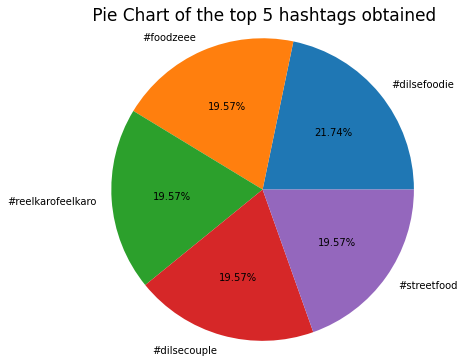

In [192]:
from pylab import rcParams

#Using ans_24 from 2.4
for i in range(5):
    print('Hashtag', ans_24[0][i], 'was used', ans_24[1][i], 'times')
rcParams['figure.figsize'] = 6,6
plt.pie(ans_24[1][:5], labels = ans_24[0][:5], autopct = '%.2f%%', labeldistance=1.1)
plt.title(' Pie Chart of the top 5 hashtags obtained',fontsize=17)
plt.axis('equal')
plt.rcParams['font.size'] = 15
plt.show()

## Q3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier

In [263]:
def get_likes():

    wait = WebDriverWait(driver, 10)
    post = wait.until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "_9AhH0")]')))
    post.click()

    l = []
    count = 0

    while True:

        try:
            # for likes on POSTS
            wait = WebDriverWait(driver, 3)
            like_data = driver.find_elements_by_xpath("//section[@class='EDfFK ygqzn']//span")
            like = like_data[-1].get_attribute('innerHTML')

            like = int(like.replace(",",""))


        except TimeoutException:
            # for Views/likes on videos posts
            wait = WebDriverWait(driver, 5)
           
            time.sleep(3)
            ll= driver.find_element_by_xpath('//span[contains(@class, "vcOH2")]/span')
            views = ll.get_attribute("innerHTML")
            like = views
            if like is None:
                like = likes[3].span.string
            like = int(like.replace(",",""))

        l.append(like)
        count = count + 1

        if count == 10:
            break

        next_ = wait.until(EC.visibility_of_element_located((By.XPATH, '//div[contains(@class, "l8mY4")]')))
        next_.click()

    return l


In [264]:
def get_likes_handle(handles):
    d = {}
    for h in handles:
        search_and_open(h)
        time.sleep(2)
        l = get_likes()
        d[h] = l
        print('Number of likes of the top 10 posts of', h, 'are:')
        for i in l:
            print(i)
        print()   
    return d

In [265]:
# Using user_handle from Q1.1
ans_31 = get_likes_handle(user_handle)
#ans_31 = get_likes_handle(['yourfoodlab'])


Number of likes of the top 10 posts of yourfoodlab are:
34597
26231
24226
50064
50231
60369
15757
374019
63005
195435

Number of likes of the top 10 posts of foodie_incarnate are:
31928
41533
12264
188316
68786
9626
176389
230783
9284
240568

Number of likes of the top 10 posts of foodzeee are:
18184
23168
44637
23149
31815
30103
49573
30281
52396
36659

Number of likes of the top 10 posts of dilsefoodie are:
4830
16996
21842
3946
7044
17019
21724
10089
66942
7658

Number of likes of the top 10 posts of food are:
245
312
500
818
401
712
706
1047
764
737



## Q3.2 Calculate the average likes for a handle

In [266]:
def get_average_likes(d):
    d_avg = {}
    for k,v in d.items():
            avg = sum(v) // 10
            d_avg[k] = avg
    return d_avg

In [267]:
#Using ans_31 from q3.1
ans_32 = get_average_likes(ans_31)

print('Average likes for each handle are:')
for k,v in ans_32.items():
    print(k, ":", v)

Average likes for each handle are:
yourfoodlab : 89393
foodie_incarnate : 100947
foodzeee : 33996
dilsefoodie : 17809
food : 624


## Q3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle

In [277]:
def get_average_followers_like_ratio(k_5, f_5, d):
    d_ratio={}
    for i in range(5):
        d_ratio[k_5[i]] = (f_5[i])//(d[k_5[i]])
    return d_ratio

In [278]:
followers = []
for i in user_id_followers:
    followers.append(i[0])
followers

[1870717, 1228427, 1146381, 967581, 161270]

In [280]:
#Using user_handle from Q1.1 and ans_32 from Q3.2

ans_33 = get_average_followers_like_ratio(user_handle, followers, ans_32)

print('Average followers:like ratio of each handle are:')
for k,v in ans_33.items():
    print(k, ":", v)

Average followers:like ratio of each handle are:
yourfoodlab : 20
foodie_incarnate : 12
foodzeee : 33
dilsefoodie : 54
food : 258


## Q3.4 Create a bar graph to depict the above obtained information

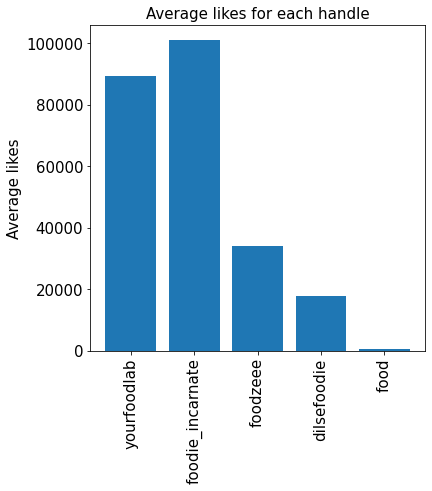

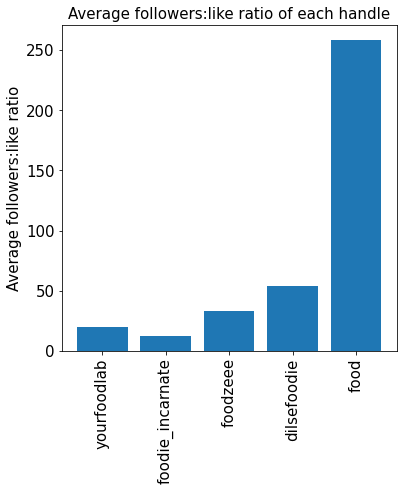

In [276]:
## Using ans_32 and ans_33 from 3.2 and 3.3 respectively

keys_32 = np.array(list(ans_32.keys()))
values_32 = np.array(list(ans_32.values()))

rcParams['figure.figsize'] = 6,6
plt.bar(keys_32,values_32)
plt.ylabel('Average likes',fontsize=15)
plt.title('Average likes for each handle',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

keys_33 = np.array(list(ans_33.keys()))
values_33 = np.array(list(ans_33.values()))

plt.bar(keys_33,values_33)
plt.ylabel('Average followers:like ratio',fontsize=15)
plt.title('Average followers:like ratio of each handle',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()